<a href="https://colab.research.google.com/github/KZhambyl/Sentiment_analysis/blob/main/Review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd

reviews_with_ratings = [
    ("Платформа отличная, много курсов, материалы доступны 24/7, удобно учиться в любое время, рекомендую", 5),
    ("Очень довольна курсом, все понятно, материалы качественные, хорошие преподаватели", 5),
    ("Курсы очень полезные, структура уроков удобная, но хотелось бы больше практических заданий", 4),
    ("Не совсем понятно, как работает система оценки, поддержка долго не отвечает на вопросы", 2),
    ("Прекрасная платформа, интересные темы для обучения, удобный интерфейс, приятный опыт", 5),
    ("Нравится возможность учиться в удобное время, но иногда курс не обновляется достаточно быстро", 4),
    ("Слишком дорогие курсы, не всегда оправдывают свою цену, есть аналоги дешевле", 2),
    ("Очень хороший сайт, удобно искать курсы, но был случай с неполной загрузкой материалов", 3),
    ("Платформа отличная, курсы разнообразные, но хотелось бы больше внимания уделять актуальным трендам", 4),
    ("Очень помогли в поиске подходящего курса, теперь прохожу несколько курсов одновременно, система удобная", 5),
    ("Прошла курс по программированию, очень довольна результатом, курс структурирован, все четко объясняется", 5),
    ("Невозможно пройти курс из-за постоянных технических сбоев, сайт не работает нормально, очень разочарована", 1),
    ("Очень хороший сервис, курсы интересные и увлекательные, но в последнее время было несколько проблем с доступом к материалам", 3),
    ("Мне нравится эта платформа, но нет функции скачивания материалов, это немного неудобно", 4),
    ("Курс оказался полезным, но интерфейс мог бы быть удобнее", 3),
    ("Платформа интересная, но некоторые курсы на сайте имеют низкое качество", 2),
    ("Курс по JavaScript очень хороший, но не хватает дополнительных заданий для закрепления материала", 4),
    ("Очень хороший курс по Python, но иногда информация перегружена", 4),
    ("Платформа хорошая, но есть проблемы с быстрым доступом к материалам", 3),
    ("Курсы интересные, но иногда сайт работает с задержками", 3),
    ("Платформа удобная, но хотелось бы улучшить поиск по курсам", 4),
    ("Хороший выбор курсов, но есть проблемы с коммуникацией с преподавателями, хотелось бы больше взаимодействия", 3),
    ("Отличная платформа для самообразования, особенно для профессионалов, много материалов на английском", 5),
    ("Курс оказался полезным, но хотелось бы больше практических занятий и меньше теории", 4),
    ("Платформа работает замечательно, но дизайн интерфейса можно было бы сделать более удобным", 4),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Заказала курс, но технические проблемы не позволили получить доступ вовремя, пришлось ждать", 2),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Обучение очень интересно, но у меня возникли проблемы с доступом к одному из курсов, служба поддержки не помогла", 2),
    ("Очень хороший сервис, курсы интересные и увлекательные, но в последнее время было несколько проблем с доступом к материалам", 3),
    ("Очень недовольна качеством обучения, материал представлен на очень низком уровне, не рекомендую", 1),
    ("Платформа хорошая, но платные курсы достаточно дорогие", 3),
    ("Прекрасная платформа для изучения английского языка, материал доступный, хороший интерфейс", 5),
    ("Не могу найти нужный курс, поиск по ключевым словам не работает корректно, это затрудняет обучение", 2),
    ("Очень удобно, что можно проходить курсы по гибкому расписанию, но некоторые курсы перегружены информацией", 4),
    ("Слишком много рекламы на платформе, это отвлекает от обучения", 2),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Не всегда качественная поддержка, иногда приходится долго ждать ответ, но в целом курсы хорошие", 3),
    ("Много информации, но иногда не хватает четкой структуры, сложно ориентироваться среди всего материала", 3),
    ("Раньше было все идеально, но с недавних пор возникли проблемы с загрузкой видеоуроков", 2),
    ("Обучение на платформе помогает расширить кругозор, но курсы не всегда достаточно подробные", 4),
    ("Обучение на платформе удобно, но сервис поддержки мог бы работать быстрее", 3),
    ("Платформа интересная, много курсов, но навигация по сайту оставляет желать лучшего", 3),
    ("Очень неудобная платформа, навигация сложная и неинтуитивная", 2),
    ("Курс был не структурирован, не хватало пояснений, особенно по важным темам", 2),
    ("Не получилось пройти курс, сайт постоянно выдавал ошибки, а техподдержка не помогала", 1),
    ("Видео материалы некачественные, картинка размыта, звук низкого качества", 2),
    ("Система оценки не работает корректно, неясно, как проверяются задания", 2),
    ("Поддержка не отвечает на вопросы, пришлось долго ждать помощи", 2),
    ("Курсы слишком поверхностные, ничего нового не узнал, все было слишком простое", 2),
    ("Преподаватели не отвечают на вопросы, очень трудно получить помощь", 1),
    ("Материалы старые, неактуальные и с ошибками, курс не соответствует заявленному содержанию", 2),
    ("Неудобно учиться на платформе, все перегружено информацией, сложно найти нужное", 2),
    ("Хороший сайт, но платформа не всегда корректно отображает мои достижения по курсу", 3),
    ("Платформа удобная, но хотелось бы больше тренингов по практическим навыкам", 4),
    ("Очень полезный курс, но платформа постоянно сбоит, приходится повторно загружать материал", 2),
    ("Прекрасный курс по аналитике, все понятное, преподаватель замечательный, все очень интересно", 5),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Заказала курс, но технические проблемы не позволили получить доступ вовремя, пришлось ждать", 2),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Заказала курс, но технические проблемы не позволили получить доступ вовремя, пришлось ждать", 2),
    ("Очень много интересных курсов, но не хватает материалов для углубленного изучения", 3),
    ("Платформа очень хорошая, но недостаточно продуманы мобильные приложения", 3),
    ("Курсы хорошие, но хочется видеть больше отзывов от других пользователей, чтобы делать более обоснованный выбор", 3),
    ("Отличная платформа для изучения языков, у меня был замечательный опыт", 5),
    ("Обучение отлично подходит для новичков, но для более опытных пользователей курсы недостаточно сложные", 4),
    ("Очень удобная система, но иногда возникают сбои с оплатой и доступом к материалам", 3),
    ("Техническая поддержка не помогла с проблемой доступа к курсу, пришлось долго разбираться", 2),
    ("Очень интересный курс, материалы доступны на всех устройствах, но хотелось бы больше практических занятий", 4),
    ("Платформа удобная, но курсы достаточно поверхностные, не хватает глубины", 3),
    ("Платформа не всегда работает стабильно, но курсы все же очень полезные", 4),
    ("Курс по программированию очень понравился, но не хватает возможности общения с преподавателями", 4),
    ("Очень хороший курс, но мне не хватило поддержки в процессе обучения", 3),
    ("Платформа удобная, но хотелось бы, чтобы курсы были более адаптированы для мобильных устройств", 4),
    ("Удобный доступ к материалам, но не всегда они обновляются вовремя", 3),
    ("Хорошая платформа, много курсов, но некоторые из них не всегда актуальны", 3),
    ("Платформа с интересным контентом, но иногда курсы перегружены теорией", 3),
    ("Обучение разнообразное и доступное, но хотелось бы больше дополнительных материалов", 4),
    ("Платформа хорошая, но иногда курсы не обновляются, это может быть проблемой", 3),
    ("Хороший сайт, но интерфейс не всегда удобен, иногда сложно найти нужный курс", 3),
    ("Отличные курсы по маркетингу, но было бы полезно иметь больше интерактивных заданий", 4),
    ("Отличная платформа для новичков, но более опытным пользователям может не хватить глубоких курсов", 3),
    ("Прекрасный курс по аналитике данных, но хотелось бы больше практических примеров", 4),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Заказала курс, но технические проблемы не позволили получить доступ вовремя, пришлось ждать", 2),
    ("Удобный интерфейс, курсы отлично структурированы, но много материала без практических заданий", 4),
    ("Очень много интересных курсов, но не хватает материалов для углубленного изучения", 3),
    ("Платформа хорошая, но бывают проблемы с онлайн-тестами", 3),
    ("Курсы на платформе могут быть полезными, но часто не хватает чёткости в материалах", 3),
    ("Очень полезные курсы, но платформа иногда зависает, что мешает обучению", 3),
    ("Платформа удобная, но интерфейс можно улучшить", 4),
    ("Обучение помогает развиваться, но иногда хочется больше практики", 4),
    ("Хороший сайт для обучения, но можно добавить больше курсов по современным технологиям", 3),
    ("Платформа хорошая, но интерфейс достаточно сложный, не сразу понятно, как пользоваться", 3),
    ("Отличный курс по SEO, но слишком много теории", 4),
    ("Очень хороший курс по созданию сайтов, но хочется больше подробных примеров", 4),
    ("Платформа хорошая, но курсы для профессионалов не всегда соответствуют ожиданиям", 3),
    ("Очень хорошие курсы по аналитике, но хотелось бы больше реальных кейсов", 4),
    ("Курс оказался полезным, но интерфейс мог бы быть удобнее", 3),
    ("Платформа интересная, но некоторые курсы на сайте имеют низкое качество", 2),
    ("Курс по JavaScript очень хороший, но не хватает дополнительных заданий для закрепления материала", 4),
    ("Очень хороший курс по Python, но иногда информация перегружена", 4),
    ("Платформа хорошая, но есть проблемы с быстрым доступом к материалам", 3),
    ("Курсы интересные, но иногда сайт работает с задержками", 3),
    ("Платформа удобная, но хотелось бы улучшить поиск по курсам", 4),
    ("Курс хороший, но хотелось бы больше практических примеров", 4),
    ("Отличная платформа для изучения английского языка, много полезных ресурсов", 5),
    ("Хороший курс по цифровому маркетингу, но хотелось бы больше примеров", 4),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Заказала курс, но технические проблемы не позволили получить доступ вовремя, пришлось ждать", 2),
    ("Сайт работает медленно, очень долго грузятся страницы, трудно учиться", 2),
    ("Курсы слишком простые, не хватает углубленных тем и практических заданий", 2),
    ("Не могу найти материалы для курса, интерфейс платформы слишком запутан", 1),
    ("Видеоуроки неинформативные, преподаватели не объясняют материал должным образом", 2),
    ("Программное обеспечение платформы часто дает сбои, теряются все данные", 1),
    ("Неудобное расписание курсов, приходится тратить много времени на поиск нужных занятий", 2),
    ("Материалы курса не соответствуют реальной практике, очень устарели", 2),
    ("Очень мало примеров и заданий для самостоятельной работы", 2),
    ("Не понравилась платформа — слишком сложная и не гибкая, сложно найти нужную информацию", 1),
    ("Записался на курс, но видеоматериалы были не доступны, поддержка не помогла", 1),
    ("Удобный интерфейс, курсы отлично структурированы, но много материала без практических заданий", 4),
    ("Очень много интересных курсов, но не хватает материалов для углубленного изучения", 3),
    ("Не всегда все работает корректно, но курсы достаточно полезные", 3),
    ("Платформа удобная, но поиск по курсам не всегда дает точные результаты", 3),
    ("Курсы хорошие, но на платформе иногда бывает задержка с загрузкой материала", 3),
    ("Заказала курс, но технические проблемы не позволили получить доступ вовремя, пришлось ждать", 2),
    ("Прекрасный сервис, курсы интересные, но не хватает интерактивных заданий", 4),
    ("Очень удобная платформа, но иногда возникают сбои в системе", 3),
    ("Курс хороший, но хотелось бы больше поддержки от преподавателей", 4),
    ("Очень много полезной информации, но интерфейс можно сделать более удобным", 3),
    ("Отличный сайт для обучения, но курсы для профессионалов могли бы быть более углубленными", 4),
    ("Платформа с интересным контентом, но иногда курсы перегружены теорией", 3),
    ("Обучение разнообразное и доступное, но хотелось бы больше дополнительных материалов", 4),
    ("Платформа хорошая, но иногда курсы не обновляются, это может быть проблемой", 3),
    ("Хороший сайт, но интерфейс не всегда удобен, иногда сложно найти нужный курс", 3),
    ("Платформа хорошая, но иногда в курсах слишком много теории", 3),
    ("Отличная платформа для обучения, но иногда интерфейс не очень удобен", 3),
    ("Курс по Python отличный, но хотелось бы больше задач для практики", 4),
    ("Платформа очень полезная, но есть проблемы с технической поддержкой", 3),
    ("Очень хороший курс по машинному обучению, но стоит улучшить качество тестов", 4),
    ("Очень хороший сайт для обучения, но хотелось бы больше курсов по современным темам", 4),
    ("Платформа замечательная, но интерфейс иногда требует улучшений", 3),
    ("Курс хороший, но хотелось бы больше примеров реальных проектов", 4),
    ("Очень интересный курс, но иногда трудно найти нужные материалы", 4),
    ("Очень хороший курс по созданию мобильных приложений, но интерфейс можно улучшить", 4),
    ("Платформа удобная, но хотелось бы больше ресурсов для углубленного обучения", 4),
    ("Курсы на платформе отличные, но было бы хорошо добавить больше тренингов по навыкам", 4),
    ("Очень хороший сайт для обучения, но хотелось бы больше материалов на разных языках", 3),
    ("Курсы хорошие, но хотелось бы больше интерактивных заданий, чтобы лучше усваивать материал", 4),
    ("Платформа с интересным контентом, но иногда курсы перегружены теорией", 3),
    ("Обучение разнообразное и доступное, но хотелось бы больше дополнительных материалов", 4),
    ("Платформа хорошая, но иногда курсы не обновляются, это может быть проблемой", 3),
    ("Хороший сайт, но интерфейс не всегда удобен, иногда сложно найти нужный курс", 3),
    ("Отличные курсы по маркетингу, но было бы полезно иметь больше интерактивных заданий", 4),
    ("Прекрасная платформа для изучения английского языка, материал доступный, хороший интерфейс", 5),
    ("Не могу найти нужный курс, поиск по ключевым словам не работает корректно, это затрудняет обучение", 2),
    ("Очень удобно, что можно проходить курсы по гибкому расписанию, но некоторые курсы перегружены информацией", 4),
    ("Слишком много рекламы на платформе, это отвлекает от обучения", 2),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Заказала курс, но технические проблемы не позволили получить доступ вовремя, пришлось ждать", 2),
    ("Удобный интерфейс, курсы отлично структурированы, но много материала без практических заданий", 4),
    ("Очень много интересных курсов, но не хватает материалов для углубленного изучения", 3),
    ("Интерфейс удобный, курсы интересные, но иногда не хватает четких инструкций по заданиям", 3),
    ("Платформа дает много материалов для обучения, но есть сложности с оплатой, приходится долго разбираться с процессом", 3),
    ("Очень много курсов по разным направлениям, особенно нравится раздел по бизнес-курсам, но цены слишком высокие для большинства пользователей", 3),
    ("Отличная платформа для обучения, есть бесплатные курсы, которые тоже дают полезные знания", 5),
    ("Не всегда качественная поддержка, иногда приходится долго ждать ответ, но в целом курсы хорошие", 3),
    ("Много информации, но иногда не хватает четкой структуры, сложно ориентироваться среди всего материала", 3),
    ("Раньше было все идеально, но с недавних пор возникли проблемы с загрузкой видеоуроков", 2),
    ("Отличная платформа для обучения, но хотелось бы больше практических заданий", 4),
    ("Очень интересный курс, но для более продвинутых пользователей могло бы быть больше контента", 4),
    ("Курс замечательный, но хотелось бы больше примеров из реальной практики", 4),
    ("Отличная платформа для старта, но для продвинутых пользователей курсы не всегда достаточно сложные", 3),
    ("Платформа хорошая, но сервис поддержки мог бы работать быстрее", 3),
    ("Отличные курсы, но немного дорого", 4),
    ("Очень полезный курс, но хотелось бы больше упражнений для закрепления знаний", 4),
    ("Платформа удобная, но иногда в ней бывают сбои", 3),
    ("Очень полезный курс по нейросетям, но иногда трудно понимать теоретическую часть", 4),
    ("Отличный курс по Python, но нужно добавить больше примеров", 4),
    ("Платформа хорошая, но платные курсы достаточно дорогие", 3)
]

# Convert to DataFrame
df = pd.DataFrame(reviews_with_ratings, columns=["text", "rating"])

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df["clean_text"] = df["text"].apply(clean_text)

# Convert rating to sentiment label
def rating_to_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df["label"] = df["rating"].apply(rating_to_sentiment)
labels = df["label"]


# Preview
df.sample(5)


,text,rating,clean_text,label
59,"Платформа удобная, но хотелось бы больше трени...",4,платформа удобная но хотелось бы больше тренин...,2
55,"Преподаватели не отвечают на вопросы, очень тр...",1,преподаватели не отвечают на вопросы очень тру...,0
65,"Отличная платформа для обучения, есть бесплатн...",5,отличная платформа для обучения есть бесплатны...,2
47,"Платформа интересная, много курсов, но навигац...",3,платформа интересная много курсов но навигация...,1
134,Очень мало примеров и заданий для самостоятель...,2,очень мало примеров и заданий для самостоятель...,0


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoTokenizer
import os
os.environ["WANDB_DISABLED"] = "true"

tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")


# Load pre-trained BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("cointegrated/rubert-tiny", num_labels=3)

# Split data into train and validation sets (80/20 split)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["clean_text"].tolist(), labels.tolist(), test_size=0.2
)

# Tokenize the texts for train and validation sets
train_encodings = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
val_encodings = tokenizer(val_texts, padding=True, truncation=True, return_tensors="pt", max_length=128)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
)

# Initialize Trainer with model, args, and dataset
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Fine-tune the model
trainer.train()

# Save the model after training
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")

# Evaluate model on validation set
eval_results = trainer.evaluate()

# Print evaluation results
print(eval_results)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss


{'eval_loss': 1.067596435546875, 'eval_runtime': 0.1979, 'eval_samples_per_second': 202.072, 'eval_steps_per_second': 15.155, 'epoch': 3.0}


In [ ]:
import torch
from transformers import pipeline

In [ ]:
# Load the fine-tuned model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")

# Initialize sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Sample reviews from your dataset
reviews = [review for review, rating in reviews_with_ratings]

# Perform sentiment classification on each review
predictions = sentiment_analyzer(reviews)

reviews_with_sentiments = [(review, prediction['label']) for review, prediction in zip(reviews, predictions)]

df_reviews = pd.DataFrame(reviews_with_sentiments, columns=["review", "sentiment"])

# Print the results for each review
for review, prediction in zip(reviews, predictions):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {prediction['label']} (Confidence: {prediction['score']:.2f})")
    print("-" * 80)

Device set to use cpu


Review: Платформа отличная, много курсов, материалы доступны 24/7, удобно учиться в любое время, рекомендую
Predicted Sentiment: LABEL_2 (Confidence: 0.34)
--------------------------------------------------------------------------------
Review: Очень довольна курсом, все понятно, материалы качественные, хорошие преподаватели
Predicted Sentiment: LABEL_2 (Confidence: 0.36)
--------------------------------------------------------------------------------
Review: Курсы очень полезные, структура уроков удобная, но хотелось бы больше практических заданий
Predicted Sentiment: LABEL_2 (Confidence: 0.36)
--------------------------------------------------------------------------------
Review: Не совсем понятно, как работает система оценки, поддержка долго не отвечает на вопросы
Predicted Sentiment: LABEL_1 (Confidence: 0.36)
--------------------------------------------------------------------------------
Review: Прекрасная платформа, интересные темы для обучения, удобный интерфейс, приятный опыт

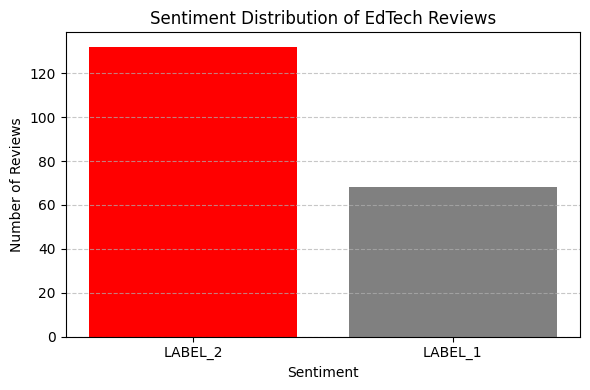

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Count predicted sentiments
predicted_labels = [pred["label"] for pred in predictions]
sentiment_counts = Counter(predicted_labels)

# Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=["red", "gray", "green"])
plt.title("Sentiment Distribution of EdTech Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
!pip install stopwords

In [ ]:
from stopwords import get_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


# Fetch Russian stopwords
russian_stopwords = get_stopwords("ru")


# Function to extract top keywords for a sentiment class
def extract_keywords(sentiment_label, top_n=5):
    subset = df_reviews[df_reviews["sentiment"] == sentiment_label]
    if len(subset) == 0:
        return []

    # Use stopwords list in TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words=russian_stopwords, max_features=1000)
    X = vectorizer.fit_transform(subset["review"])
    indices = X.mean(axis=0).argsort()[0, ::-1][:top_n]
    keywords = [vectorizer.get_feature_names_out()[i] for i in indices.A1]
    return keywords

# Get keywords for each sentiment class
keywords_positive = extract_keywords("LABEL_2")  # assuming LABEL_2 = Positive
keywords_negative = extract_keywords("LABEL_0")  # assuming LABEL_0 = Negative
keywords_neutral  = extract_keywords("LABEL_1")  # assuming LABEL_1 = Neutral

# Print the keywords
print("Top keywords in Positive Reviews:", keywords_positive)
print("Top keywords in Negative Reviews:", keywords_negative)
print("Top keywords in Neutral Reviews:", keywords_neutral)


Top keywords in Positive Reviews: ['курсы', 'платформа', 'курс', 'хотелось', 'обучения', 'хороший', 'хватает', 'интерфейс', 'отличная', 'курсов', 'удобный', 'полезные', 'заданий', 'интересные', 'материалов', 'хорошая', 'практических', 'знания', 'дают', 'бесплатные', 'заданиям', 'инструкций', 'четких', 'сайт', 'пользователей', 'изучения', 'нравится', 'курсам', 'удобная', 'достаточно', 'примеров', 'раздел', 'разным', 'направлениям', 'цены', 'большинства', 'бизнес', 'высокие', 'проблемы', 'обучение', 'углубленного', 'материалы', 'доступом', 'дополнительных', 'хорошие', 'материала', 'интересных', 'материалам', 'удобен', 'платформе', 'интерактивных', 'материал', 'найти', 'отлично', 'теории', 'перегружены', 'интересным', 'контентом', 'теорией', 'доступное', 'разнообразное', 'дорогие', 'маркетингу', 'отличный', 'отличные', 'практики', 'структурированы', 'профессионалов', 'поддержки', 'замечательный', 'закрепления', 'нужный', 'сложно', 'прекрасный', 'аналитике', 'интересный', 'сервис', 'англий

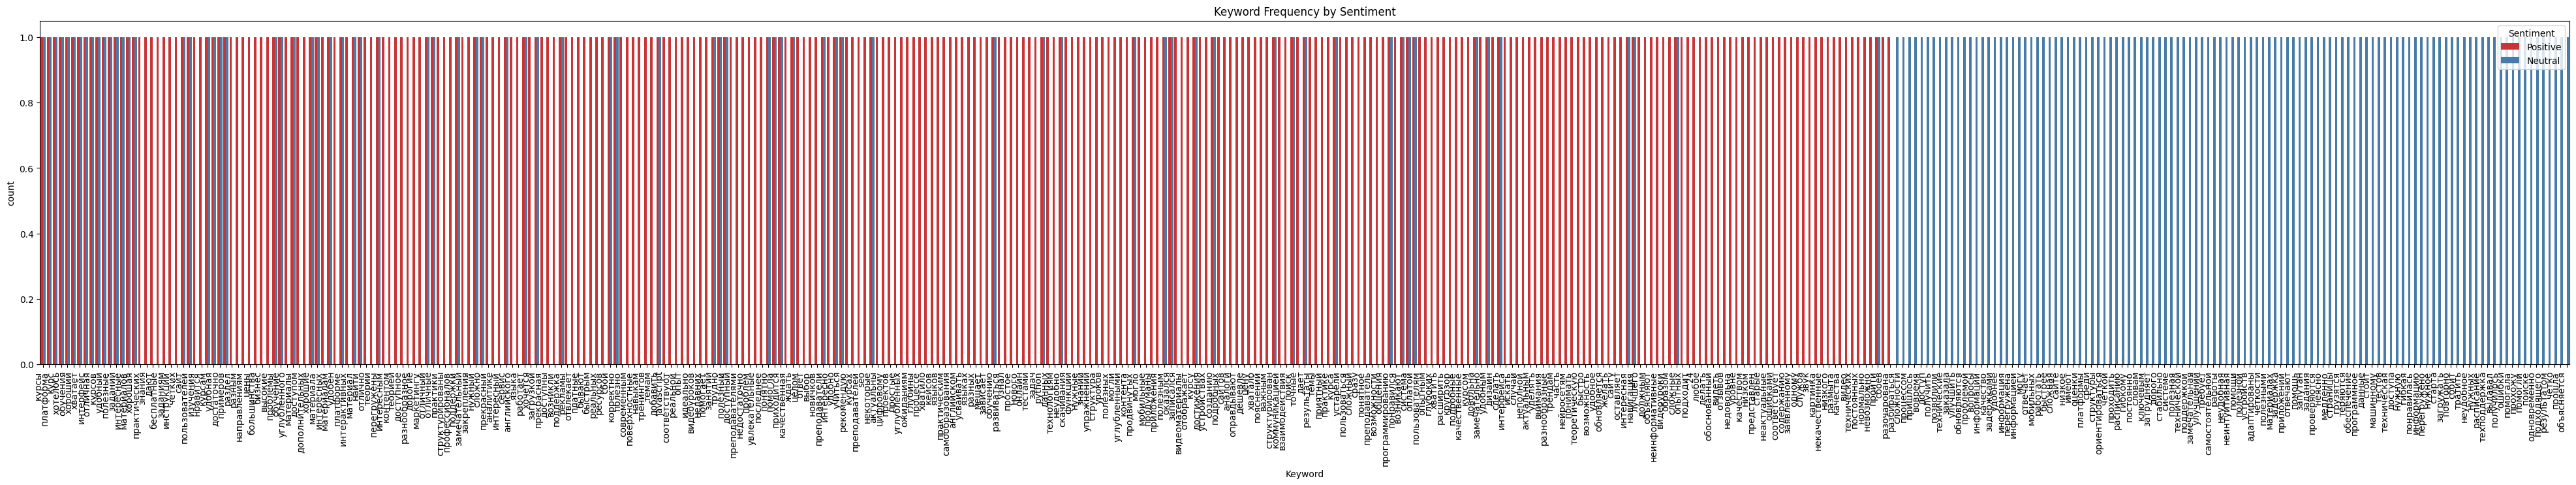

In [ ]:
import seaborn as sns

# Combine keywords into a dictionary for plotting
keywords_data = {
    'Positive': keywords_positive,
    'Negative': keywords_negative,
    'Neutral': keywords_neutral
}

# Create a DataFrame for easy plotting
keywords_df = []
for sentiment, keywords in keywords_data.items():
    for keyword in keywords:
        keywords_df.append({'Sentiment': sentiment, 'Keyword': keyword})

# Create a bar chart to show the frequency of keywords in each sentiment class
keyword_freq_df = pd.DataFrame(keywords_df)
plt.figure(figsize=(40, 6))
sns.countplot(x="Keyword", hue="Sentiment", data=keyword_freq_df, palette="Set1", )
plt.tight_layout()
plt.title('Keyword Frequency by Sentiment')
plt.xticks(rotation=90, ha="right")
plt.show()


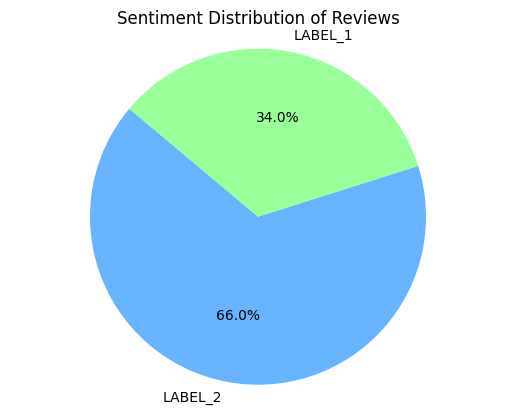

In [ ]:
# Create a pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#66b3ff','#99ff99','#ff6666']  # Colors for Positive, Neutral, Negative

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Distribution of Reviews")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
